# Education Analysis

1. Borough Attendance Data

- What is the attendance percentage and chronically absent percentage over the years?

- What is the attendance percentage and chronically absent percentage by grade over the years?

- Compare the attendance percantage to the chronically absent percentage


2. Borough Graduation Data 

- What is the graduation and dropout percentage over the years?
 
- How many years does it usually take for students to graduate?

- What is the average demographic graduation percentage?

In [1170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## 1. Borough Attendance Data

In [1171]:
df = pd.read_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/public-school-attendance-results 2016-2021.csv")

df

,DBN,Borough,School Name,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,01M034,Manhattan,P.S. 034 Franklin D. Roosevelt,9,All Students,2016-17,28,s,s,s,s,s,s
1,01M140,Manhattan,P.S. 140 Nathan Straus,9,All Students,2016-17,72,s,s,s,s,s,s
2,01M140,Manhattan,P.S. 140 Nathan Straus,9,All Students,2020-21,90,s,s,s,s,s,s
3,01M188,Manhattan,P.S. 188 The Island School,9,All Students,2017-18,7,s,s,s,s,s,s
4,01M292,Manhattan,Orchard Collegiate Academy,9,All Students,2016-17,6306,499,5807,92.1,41,13,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124520,75X811,Bronx,P.S. X811,12,Not ELL,2018-19,37488,5849,31639,84.4,216,102,47.2
124521,75X811,Bronx,P.S. X811,12,ELL,2019-20,15138,3010,12128,80.1,133,86,64.7
124522,75X811,Bronx,P.S. X811,12,Not ELL,2019-20,24662,3575,21087,85.5,219,108,49.3
124523,75X811,Bronx,P.S. X811,12,ELL,2020-21,27409,6323,21086,76.9,159,98,61.6


In [1172]:
# Change objects into integers
columns = [
    "Grade",
    "# Total Days",
    "# Days Absent",
    "# Days Present",
    "% Attendance",
    "# Contributing 10+ Total Days and 1+ Pres Day",
    "# Chronically Absent",
    "% Chronically Absent"
]

for col in columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")    
    if "#" in col or "Grade" in col:
        df[col] = df[col].astype("Int64")

In [1173]:
df.dtypes

DBN                                               object
Borough                                           object
School Name                                       object
Grade                                              Int64
Category                                          object
Year                                              object
# Total Days                                       Int64
# Days Absent                                      Int64
# Days Present                                     Int64
% Attendance                                     float64
# Contributing 10+ Total Days and 1+ Pres Day      Int64
# Chronically Absent                               Int64
% Chronically Absent                             float64
dtype: object

In [1174]:
# Remove accidental header rows
df_clean = df[df["Borough"] != "Borough"]

# Define aggregation rules
agg_rules = {
    "# Total Days": "sum",
    "# Days Absent": "sum",
    "# Days Present": "sum",
    "% Attendance": "mean",
    "# Contributing 10+ Total Days and 1+ Pres Day": "sum",
    "# Chronically Absent": "sum",
    "% Chronically Absent": "mean"
}

# Group and aggregate values
agg_df = df_clean.groupby(["Borough", "Grade", "Category", "Year"], as_index=False).agg(agg_rules)

# Round percentages
agg_df["% Attendance"] = agg_df["% Attendance"].round(1)
agg_df["% Chronically Absent"] = agg_df["% Chronically Absent"].round(1)

# Sort values
agg_df = agg_df.sort_values(["Borough", "Grade", "Year"])

agg_df

,Borough,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,Bronx,9,All Students,2016-17,2457812,393491,2048170,83.0,16073,6698,44.2
5,Bronx,9,Asian,2016-17,163278,4460,120388,91.6,786,70,28.9
10,Bronx,9,Black,2016-17,653201,99155,501435,83.7,3995,1713,43.0
15,Bronx,9,ELL,2016-17,539763,72537,355657,82.6,2908,1259,45.6
20,Bronx,9,Female,2016-17,1111506,163609,939548,84.1,7259,2852,42.0
...,...,...,...,...,...,...,...,...,...,...,...
1379,Staten Island,12,Not SWD,2020-21,576144,83738,492062,84.1,3337,1217,42.5
1384,Staten Island,12,Other,2020-21,11243,1764,4536,72.5,37,22,60.5
1389,Staten Island,12,Poverty,2020-21,439940,86757,353183,80.5,2574,1189,48.1
1394,Staten Island,12,SWD,2020-21,181873,39275,130638,79.1,995,526,49.8


In [1175]:
df2 = pd.read_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/public-borough-attendance-results-2019-2024.csv")

df2

,Borough,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,Bronx,9,All Students,2018-19,2435723,359580,2076143,85.2,15489,6061,39.1
1,Bronx,9,All Students,2019-20,1611005,231979,1379026,85.6,15216,5796,38.1
2,Bronx,9,All Students,2020-21,2336983,389108,1947875,83.3,13819,5752,41.6
3,Bronx,9,All Students,2021-22,2237218,357737,1879481,84.0,13958,6550,46.9
4,Bronx,9,All Students,2022-23,2100815,299954,1800861,85.7,13736,5584,40.7
...,...,...,...,...,...,...,...,...,...,...,...
1720,Staten Island,12,Not ELL,2021-22,697708,107570,590138,84.6,4178,2032,48.6
1721,Staten Island,12,ELL,2022-23,38316,6105,32211,84.1,246,110,44.7
1722,Staten Island,12,Not ELL,2022-23,704488,86193,618295,87.8,4331,1711,39.5
1723,Staten Island,12,ELL,2023-24,33211,5100,28111,84.6,215,93,43.3


In [1176]:
# Filter df for years 
add_years = ["2016-17", "2017-18"]

df1 = agg_df[agg_df["Year"].isin(add_years)]

# Concatenate to df2
edu_df = pd.concat([df2, df1], ignore_index=True)

# Remove accidental header rows
edu_df = edu_df[edu_df["Borough"] != "Borough"]

# Sort Values
edu_df = edu_df.sort_values(["Borough", "Grade", "Year"]).reset_index(drop=True)

# Save to CSV
edu_df.to_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/attendance.csv", index=False)

edu_df

,Borough,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,Bronx,9,All Students,2016-17,2457812,393491,2048170,83.0,16073,6698,44.2
1,Bronx,9,Asian,2016-17,163278,4460,120388,91.6,786,70,28.9
2,Bronx,9,Black,2016-17,653201,99155,501435,83.7,3995,1713,43.0
3,Bronx,9,ELL,2016-17,539763,72537,355657,82.6,2908,1259,45.6
4,Bronx,9,Female,2016-17,1111506,163609,939548,84.1,7259,2852,42.0
...,...,...,...,...,...,...,...,...,...,...,...
2275,Staten Island,9,Neither male nor female,2023-24,332,s,s,s,s,s,s
2276,Staten Island,9,Not Poverty,2023-24,225710,13724,211986,93.9,1386,189,13.6
2277,Staten Island,9,Poverty,2023-24,548735,73888,474847,86.5,3453,1234,35.7
2278,Staten Island,9,ELL,2023-24,60488,9587,50901,84.2,425,162,38.1


In [1177]:
edu_df.describe()

,Borough,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
count,2280,2280,2280,2280,2280,2280,2280,2280,2280,2280,2280
unique,5,8,15,8,2275,2221,2226,364,2083,1908,791
top,Bronx,10,All Students,2022-23,330,s,s,s,s,s,s
freq,456,430,160,300,3,55,55,55,55,56,56


In [1178]:
edu_df.shape

(2280, 11)

In [1179]:
 # Remove suppressed rows
suppressed_rows = edu_df.isin(["s"]).any(axis=1)
edu_df = edu_df[~suppressed_rows]

In [1180]:
# Drop all students data
edu_df = edu_df.drop(edu_df[edu_df["Category"] == "All Students"].index)

In [1181]:
edu_df.shape

(2064, 11)

In [1182]:
edu_df.isna().sum()

Borough                                          0
Grade                                            0
Category                                         0
Year                                             0
# Total Days                                     0
# Days Absent                                    0
# Days Present                                   0
% Attendance                                     0
# Contributing 10+ Total Days and 1+ Pres Day    0
# Chronically Absent                             0
% Chronically Absent                             0
dtype: int64

In [1183]:
na_rows = edu_df[edu_df.isnull().any(axis=1)]

na_rows

,Borough,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent


In [1184]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2064 entries, 1 to 2279
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Borough                                        2064 non-null   object
 1   Grade                                          2064 non-null   object
 2   Category                                       2064 non-null   object
 3   Year                                           2064 non-null   object
 4   # Total Days                                   2064 non-null   object
 5   # Days Absent                                  2064 non-null   object
 6   # Days Present                                 2064 non-null   object
 7   % Attendance                                   2064 non-null   object
 8   # Contributing 10+ Total Days and 1+ Pres Day  2064 non-null   object
 9   # Chronically Absent                           2064 non-null   objec

In [1185]:
# Convert objects to numeric columns
numeric_columns = [col for col in edu_df.columns if "#" in col or "%" in col or "Grade" in col]
for col in numeric_columns:
    edu_df[col] = pd.to_numeric(edu_df[col], errors="coerce")
    if "#" in col or "Grade" in col:
        edu_df[col] = edu_df[col].astype("Int64")


In [1186]:
edu_df.dtypes

Borough                                           object
Grade                                              Int64
Category                                          object
Year                                              object
# Total Days                                       Int64
# Days Absent                                      Int64
# Days Present                                     Int64
% Attendance                                     float64
# Contributing 10+ Total Days and 1+ Pres Day      Int64
# Chronically Absent                               Int64
% Chronically Absent                             float64
dtype: object

What is the attendance percentage over the years?

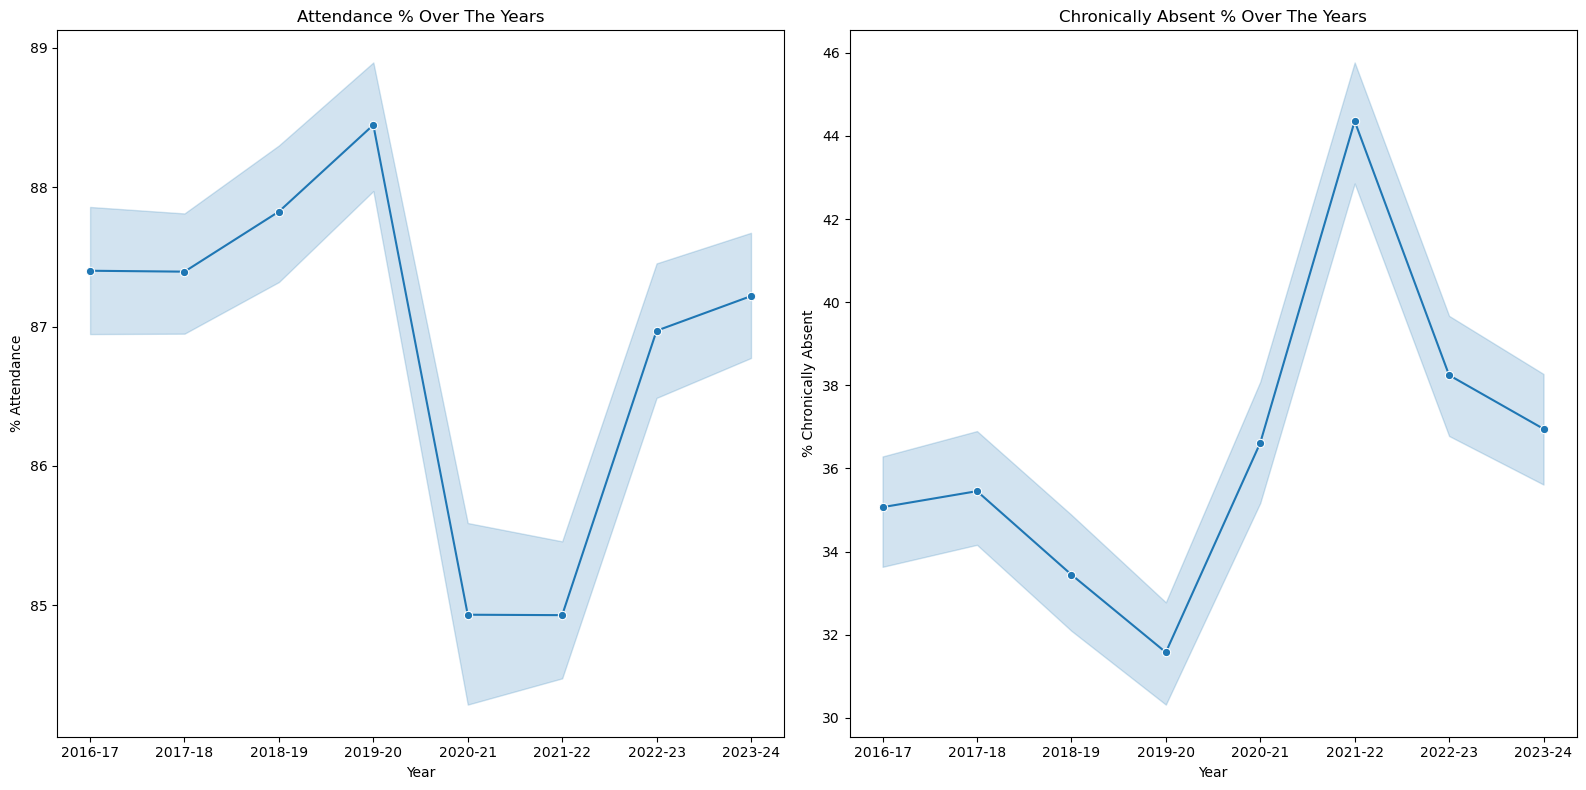

In [1187]:
# Plot graph
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.lineplot(data=edu_df, x="Year", y="% Attendance", marker="o")
plt.title("Attendance % Over The Years")

plt.subplot(1, 2, 2)
sns.lineplot(data=edu_df, x="Year", y="% Chronically Absent", marker="o")
plt.title("Chronically Absent % Over The Years")

plt.tight_layout()
plt.show()

The attendance rate of students tremendously dropped in 2019 from 89% to 85% in 2021. The chronically absent rate had an inverse effect from the attendance rate where it steadily increased from 2019 to 2021.

What is the attendance percentage and chronically absent percentage by grade over the years?

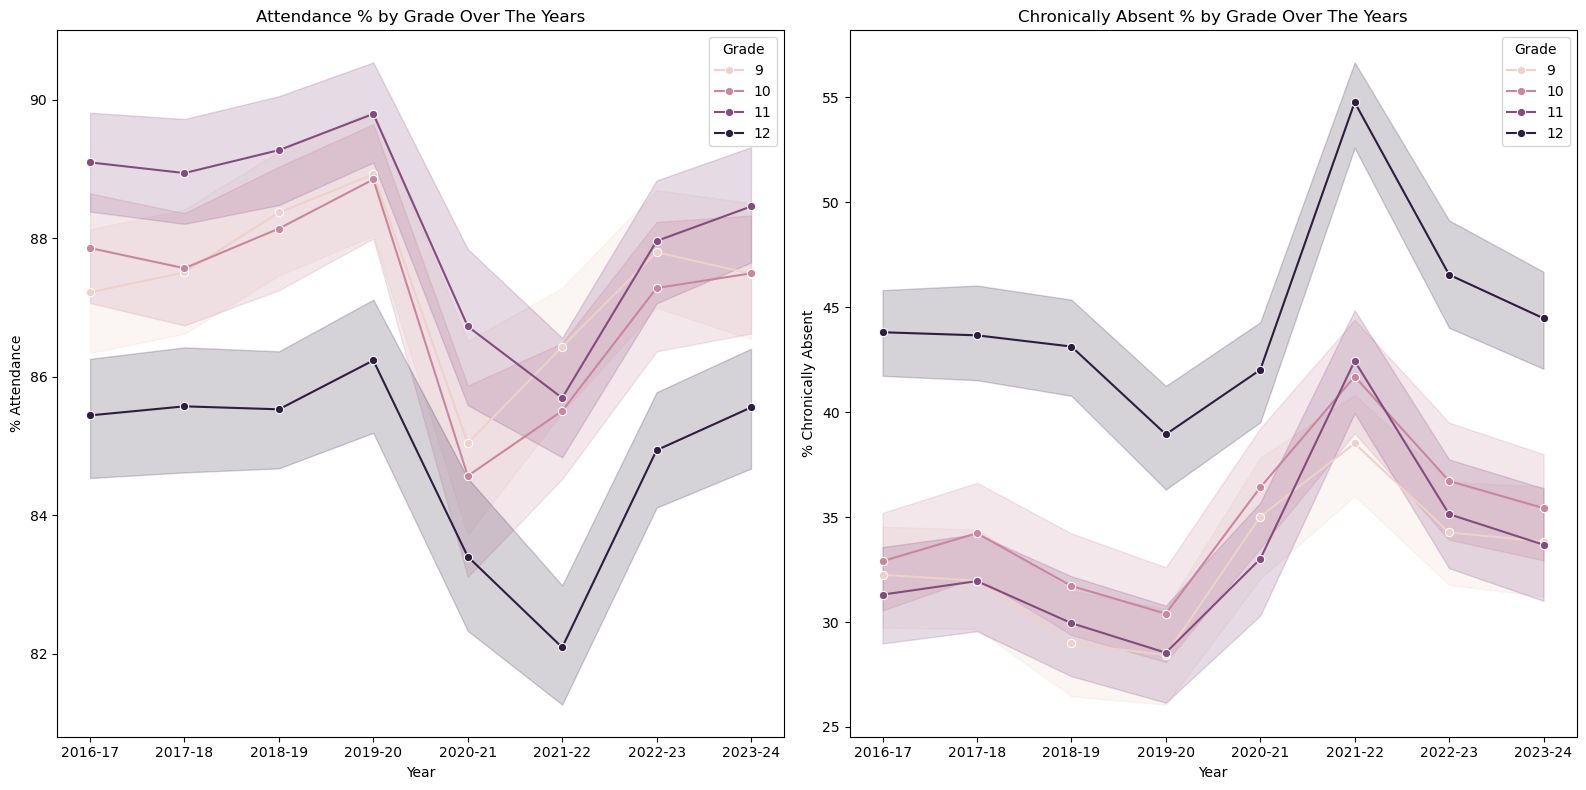

In [1188]:
# Plot graoh
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.lineplot(data=edu_df, x="Year", y="% Attendance", hue="Grade", marker="o")
plt.title("Attendance % by Grade Over The Years")

plt.subplot(1, 2, 2)
sns.lineplot(data=edu_df, x="Year", y="% Chronically Absent", hue="Grade", marker="o")
plt.title("Chronically Absent % by Grade Over The Years")

plt.tight_layout()        
plt.show()

Every single grade has similar attendance rates and they all suffered a drop in 2019. Additionally, every single grade except one chronically absent rate is similar and increased steadily from 2019.

Compare attendance percantage to chronically absent percentage 

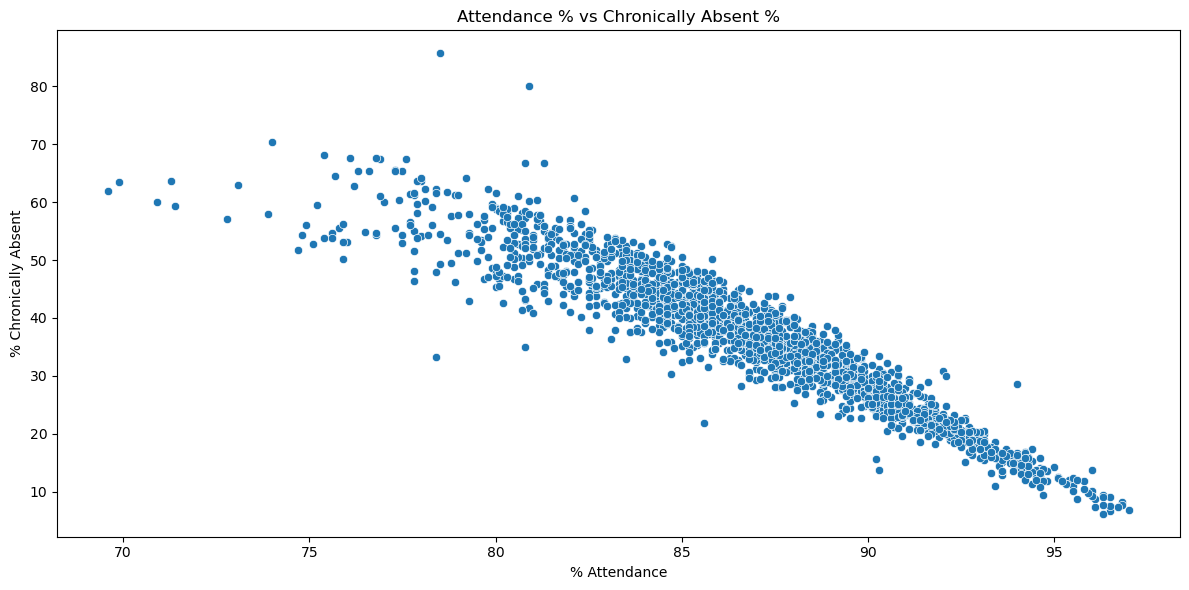

In [1189]:
# Plot graph
plt.figure(figsize=(12, 6))
sns.scatterplot(data=edu_df, x="% Attendance", y="% Chronically Absent")
plt.title("Attendance % vs Chronically Absent %")
plt.tight_layout()
plt.show()

When Attendance % is low 40%–60%, the Chronically Absent % tends to between 60%–80%. When Attendance % is above 90%, the Chronically Absent % is near 0%. There's a downward slope that becomes closer together as attendance increases which means schools with high attendance rates have fewer chronically absent students.

## 2. Borough Graduation Data

In [1190]:
grad_df = pd.read_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/2023-graduation-rates-public-borough.csv")

grad_df

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Bronx,All Students,2019,4 year August,12256,9733,79.4,9678,79.0,99.4,...,0.4,0.6,1381,11.3,957,7.8,74,0.6,91,0.7
1,Bronx,All Students,2018,4 year August,12487,9921,79.5,9874,79.1,99.5,...,0.4,0.5,1400,11.2,974,7.8,95,0.8,87,0.7
2,Bronx,All Students,2017,4 year August,13152,10220,77.7,10136,77.1,99.2,...,0.6,0.8,1761,13.4,1001,7.6,54,0.4,98,0.7
3,Bronx,All Students,2016,4 year August,13421,9938,74.0,9733,72.5,97.9,...,1.5,2.1,1976,14.7,1271,9.5,60,0.4,175,1.3
4,Bronx,All Students,2015,4 year August,13891,9752,70.2,8446,60.8,86.6,...,9.4,13.4,2124,15.3,1759,12.7,80,0.6,175,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,Staten Island,Not Econ Disadv,2016,6 year June,1981,1871,94.4,1847,93.2,98.7,...,1.2,1.3,19,1.0,71,3.6,3,0.2,17,0.9
2895,Staten Island,Not Econ Disadv,2015,6 year June,1870,1726,92.3,1559,83.4,90.3,...,8.9,9.7,41,2.2,77,4.1,3,0.2,23,1.2
2896,Staten Island,Not Econ Disadv,2014,6 year June,2022,1816,89.8,1646,81.4,90.6,...,8.4,9.4,52,2.6,125,6.2,6,0.3,23,1.1
2897,Staten Island,Not Econ Disadv,2013,6 year June,2236,1985,88.8,1810,80.9,91.2,...,7.8,8.8,56,2.5,150,6.7,11,0.5,34,1.5


In [1191]:
grad_df.describe()

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
count,2899,2899,2899,2899,2899,2899,2899,2899,2899,2899,...,2899,2899,2899,2899,2899,2899,2899,2899,2899,2899
unique,6,18,9,6,1462,2286,550,2289,613,357,...,245,357,1183,350,1075,310,260,93,221,59
top,Bronx,All Students,2017,4 year August,17,s,s,s,s,100.0,...,0.3,0.0,7,5.0,9,5.2,0,0.0,0,0.8
freq,580,180,400,645,11,24,24,24,24,141,...,152,141,43,33,44,38,399,502,169,242


In [1192]:
grad_df.shape

(2899, 27)

In [1193]:
grad_df.isna().sum()

Borough                                 0
Category                                0
Cohort Year                             0
Cohort                                  0
# Total Cohort                          0
# Grads                                 0
% Grads                                 0
# Total Regents                         0
% Total Regents of Cohort               0
% Total Regents of Grads                0
# Advanced Regents                      0
% Advanced Regents of Cohort            0
% Advanced Regents of Grads             0
# Regents without Advanced              0
% Regents without Advanced of Cohort    0
% Regents without Advanced of Grads     0
# Local                                 0
% Local of Cohort                       0
% Local of Grads                        0
# Still Enrolled                        0
% Still Enrolled                        0
# Dropout                               0
% Dropout                               0
# SACC (IEP Diploma)              

In [1194]:
# Remove suppressed rows
suppressed_rows = grad_df.isin(['s']).any(axis=1)
grad_df = grad_df[~suppressed_rows]

In [1195]:
# Dropped "Category" rows
rows_to_drop = grad_df.isin(["Category"]).any(axis=1)
grad_df  = grad_df[~rows_to_drop]

In [1196]:
# Drop all students data
grad_df = grad_df.drop(grad_df[grad_df["Category"] == "All Students"].index)

In [1197]:
grad_df.shape

(2690, 27)

In [1198]:
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2690 entries, 181 to 2898
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Borough                               2690 non-null   object
 1   Category                              2690 non-null   object
 2   Cohort Year                           2690 non-null   object
 3   Cohort                                2690 non-null   object
 4   # Total Cohort                        2690 non-null   object
 5   # Grads                               2690 non-null   object
 6   % Grads                               2690 non-null   object
 7   # Total Regents                       2690 non-null   object
 8   % Total Regents of Cohort             2690 non-null   object
 9   % Total Regents of Grads              2690 non-null   object
 10  # Advanced Regents                    2690 non-null   object
 11  % Advanced Regents of Cohort     

In [1199]:
# Select only columns with # or % to convert to int
column = [col for col in grad_df.columns if "#" in col or "%" in col or "Cohort Year" in col]

for col in column:
    grad_df[col] = pd.to_numeric(grad_df[col], errors="coerce")
    if "#" in col or "Cohort Year" in col :
        grad_df[col] = grad_df[col].astype("Int64")

In [1200]:
grad_df.dtypes

Borough                                  object
Category                                 object
Cohort Year                               Int64
Cohort                                   object
# Total Cohort                            Int64
# Grads                                   Int64
% Grads                                 float64
# Total Regents                           Int64
% Total Regents of Cohort               float64
% Total Regents of Grads                float64
# Advanced Regents                        Int64
% Advanced Regents of Cohort            float64
% Advanced Regents of Grads             float64
# Regents without Advanced                Int64
% Regents without Advanced of Cohort    float64
% Regents without Advanced of Grads     float64
# Local                                   Int64
% Local of Cohort                       float64
% Local of Grads                        float64
# Still Enrolled                          Int64
% Still Enrolled                        

What is the graduation percentage over the years?

In [1201]:
# Extract the number of years from the Cohort column
grad_df["Cohort Duration"] = grad_df["Cohort"].str.extract(r"(\d+)").astype(int)

# Add to Cohort Year to create Graduation Year
grad_df["Graduation Year"] = grad_df["Cohort Year"] + grad_df["Cohort Duration"]

In [1202]:
grad_df.head()

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort,Cohort Duration,Graduation Year
181,Bronx,ELL,2019,4 year August,1941,1356,69.9,1347,69.4,99.3,...,302,15.6,251,12.9,18,0.9,13,0.7,4,2023
182,Bronx,ELL,2018,4 year August,2474,1808,73.1,1800,72.8,99.6,...,304,12.3,304,12.3,38,1.5,20,0.8,4,2022
183,Bronx,ELL,2017,4 year August,2243,1496,66.7,1490,66.4,99.6,...,417,18.6,291,13.0,13,0.6,25,1.1,4,2021
184,Bronx,ELL,2016,4 year August,2099,1050,50.0,1008,48.0,96.0,...,525,25.0,458,21.8,23,1.1,42,2.0,4,2020
185,Bronx,ELL,2015,4 year August,2118,905,42.7,592,28.0,65.4,...,578,27.3,557,26.3,31,1.5,47,2.2,4,2019


In [1226]:
grad_df.shape

(2690, 29)

In [1203]:
grad_df.isna().sum()

Borough                                 0
Category                                0
Cohort Year                             0
Cohort                                  0
# Total Cohort                          0
# Grads                                 0
% Grads                                 0
# Total Regents                         0
% Total Regents of Cohort               0
% Total Regents of Grads                0
# Advanced Regents                      0
% Advanced Regents of Cohort            0
% Advanced Regents of Grads             0
# Regents without Advanced              0
% Regents without Advanced of Cohort    0
% Regents without Advanced of Grads     0
# Local                                 0
% Local of Cohort                       0
% Local of Grads                        0
# Still Enrolled                        0
% Still Enrolled                        0
# Dropout                               0
% Dropout                               0
# SACC (IEP Diploma)              

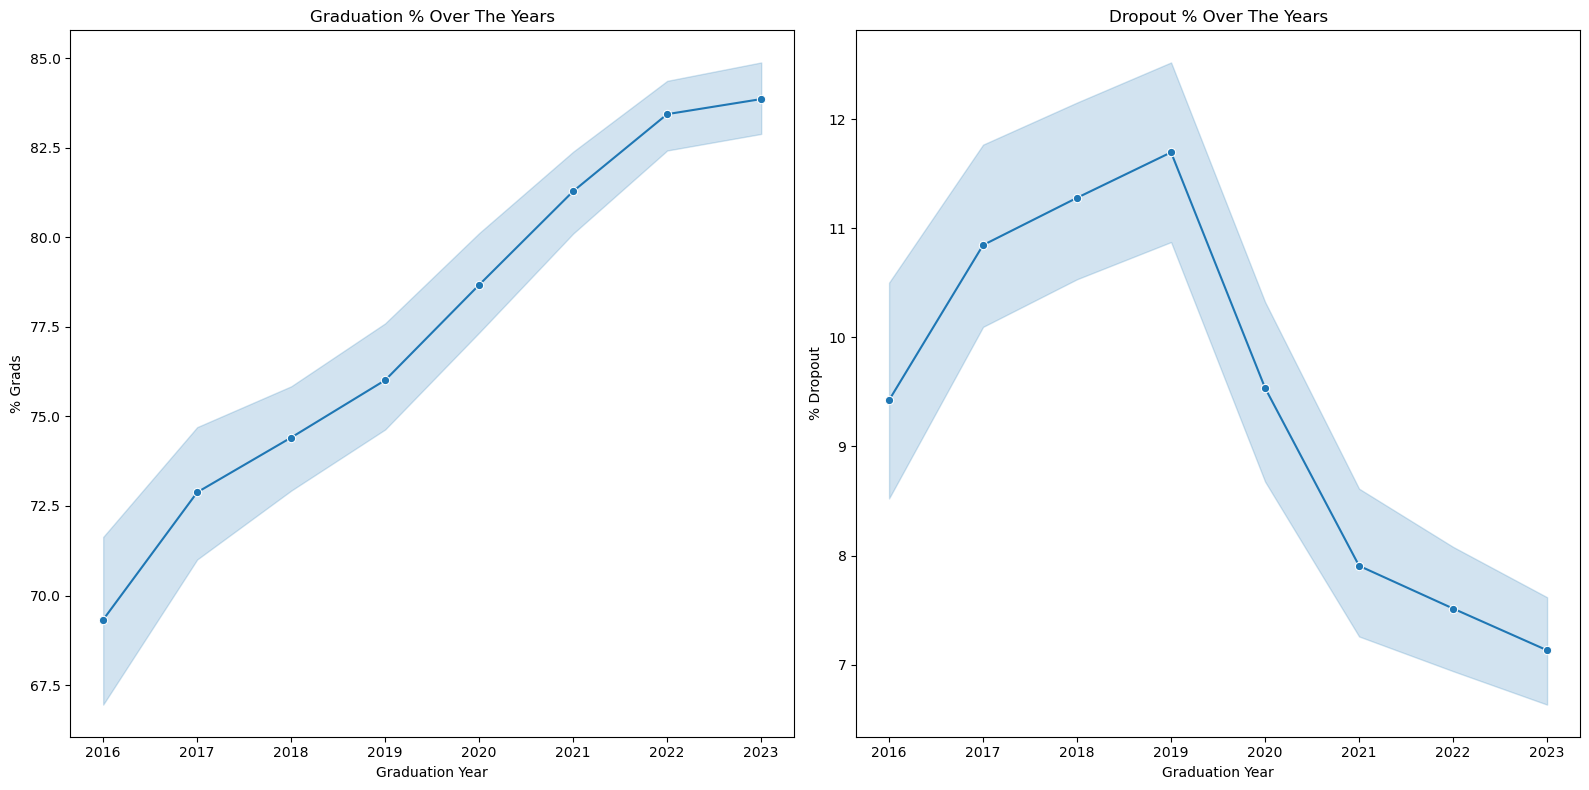

In [1204]:
# Plot graph
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.lineplot(data=grad_df, x="Graduation Year", y="% Grads", marker="o")
plt.title("Graduation % Over The Years")

plt.subplot(1, 2, 2)
sns.lineplot(data=grad_df, x="Graduation Year", y="% Dropout", marker="o")
plt.title("Dropout % Over The Years")

plt.tight_layout()
plt.show()

More and more students have been graduating through out the years. It has been steadily rising from 70% in 2016 to 85% in 2023. Drop out students is steading rising from 9% in 2016 with a peak of 11% at 2019 but then rapidily dropped and is currently at an all time low of 6.5% in 2023.

How many years does it usually take for students to graduate?

In [1205]:
# Group by Cohort Duration and sum grads
cohort_sum = grad_df.groupby("Cohort Duration")["# Grads"].sum().reset_index()

cohort_sum

,Cohort Duration,# Grads
0,4,4463823
1,5,4166715
2,6,1826915


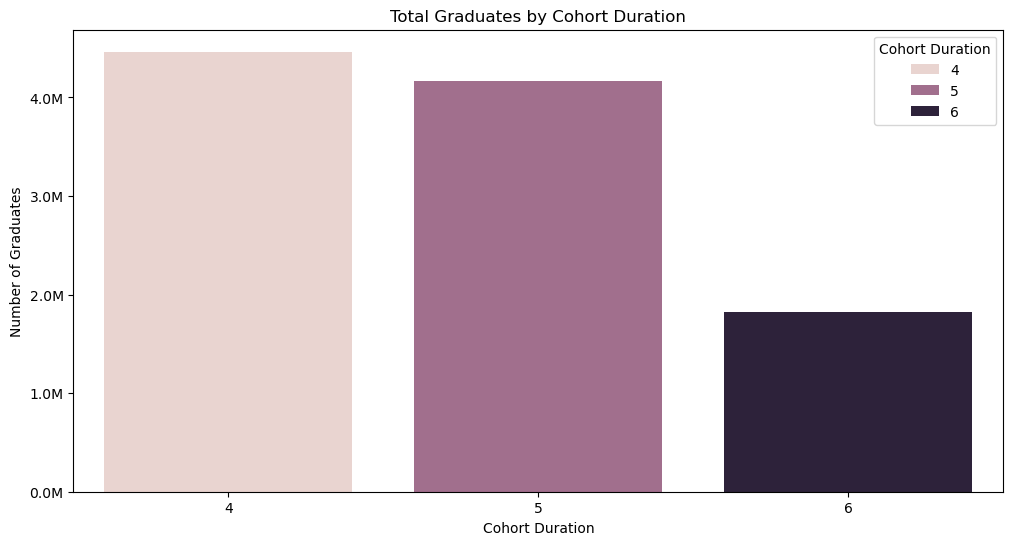

In [1206]:
# Plot graph
plt.figure(figsize=(12, 6))
sns.barplot(data=cohort_sum, x="Cohort Duration", y="# Grads", hue="Cohort Duration")

plt.title("Total Graduates by Cohort Duration")
plt.ylabel("Number of Graduates")

# Formatting y-axis to display numbers in millions
formatter = FuncFormatter(lambda x, pos: f"{x / 1e6:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

Majority of students grauate in 4 years but 5 years is a close second.

What is the average demographic graduation percentage?

In [1207]:
# Filter out demographics
category_df = grad_df[ grad_df["Category"].isin(["Asian", "Black", "Hispanic", "White", "Multi-Racial", "SWD", "ELL", "Econ Disadv"])].copy()

# Rename values to match enrollment dataset
rename_values = {
    "Asian": "% Asian",
    "Black": "% Black",
    "Hispanic": "% Hispanic",
    "White": "% White",
    "Multi-Racial": "% Multiple Race Categories Not Represented",
    "SWD": "% Students with Disabilities",
    "ELL": "% English Language Learners",
    "Econ Disadv": "% Poverty"
}

category_df["Category"] = category_df["Category"].replace(rename_values)

category_df

,Borough,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,% Total Regents of Grads,...,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort,Cohort Duration,Graduation Year
181,Bronx,% English Language Learners,2019,4 year August,1941,1356,69.9,1347,69.4,99.3,...,302,15.6,251,12.9,18,0.9,13,0.7,4,2023
182,Bronx,% English Language Learners,2018,4 year August,2474,1808,73.1,1800,72.8,99.6,...,304,12.3,304,12.3,38,1.5,20,0.8,4,2022
183,Bronx,% English Language Learners,2017,4 year August,2243,1496,66.7,1490,66.4,99.6,...,417,18.6,291,13.0,13,0.6,25,1.1,4,2021
184,Bronx,% English Language Learners,2016,4 year August,2099,1050,50.0,1008,48.0,96.0,...,525,25.0,458,21.8,23,1.1,42,2.0,4,2020
185,Bronx,% English Language Learners,2015,4 year August,2118,905,42.7,592,28.0,65.4,...,578,27.3,557,26.3,31,1.5,47,2.2,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Staten Island,% Poverty,2016,6 year June,2698,2265,84.0,2200,81.5,97.1,...,50,1.9,262,9.7,56,2.1,65,2.4,6,2022
2859,Staten Island,% Poverty,2015,6 year June,2563,2126,82.9,1825,71.2,85.8,...,64,2.5,255,9.9,69,2.7,49,1.9,6,2021
2860,Staten Island,% Poverty,2014,6 year June,2632,2155,81.9,1821,69.2,84.5,...,51,1.9,294,11.2,70,2.7,62,2.4,6,2020
2861,Staten Island,% Poverty,2013,6 year June,2378,1923,80.9,1671,70.3,86.9,...,57,2.4,290,12.2,65,2.7,42,1.8,6,2019


In [1208]:
category_sum = category_df.groupby("Category")["# Grads"].mean().reset_index()

category_sum.columns = ["Demographic", "Average %"]

category_sum

,Demographic,Average %
0,% Asian,2303.716667
1,% Black,2963.227778
2,% English Language Learners,727.183333
3,% Hispanic,4351.216667
4,% Multiple Race Categories Not Represented,172.288889
5,% Poverty,8372.883333
6,% Students with Disabilities,1557.261111
7,% White,1804.388889


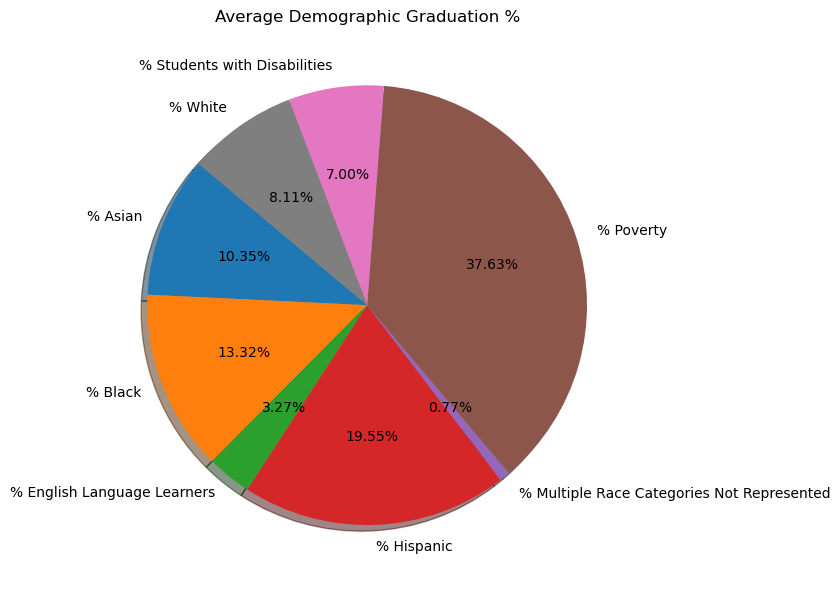

In [1209]:
# Plot Graph
labels = category_sum["Demographic"]
sizes = category_sum["Average %"]

plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("Average Demographic Graduation %")
plt.tight_layout()
plt.show()

Poverty has the highest graduation rate out of all the demographics and Hispanics has the highest graduation rate out of all the races.

## 3. Borough Regents Data



In [1210]:
regents_df = pd.read_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/2014-15-to-2022-23-nyc-regents-overall-and-by-category---public 2 (1).csv")

regents_df

/var/folders/8s/6z8k89ls5219_662hzy190h80000gn/T/ipykernel_14407/3090391321.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  regents_df = pd.read_csv("/Users/sa17/Library/Mobile Documents/com~apple~CloudDocs/Brag Folder/projects/Education-Capstone/data/2014-15-to-2022-23-nyc-regents-overall-and-by-category---public 2 (1).csv")


,School DBN,Borough,School Name,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number meeting CUNY proficiency requirmenets,Percent meeting CUNY proficiency requirmenets
0,01M292,Manhattan,Orchard Collegiate Academy,General Academic,High school,Algebra2/Trigonometry,2015,All Students,5,s,s,s,s,s,s,s,s,s
1,01M292,Manhattan,Orchard Collegiate Academy,General Academic,High school,Chinese,2015,All Students,1,s,s,s,s,s,s,s,s,s
2,01M292,Manhattan,Orchard Collegiate Academy,General Academic,High school,Common Core Algebra,2015,All Students,12,52.3,11,91.7,1,8.3,0,0.0,0,0.0
3,01M292,Manhattan,Orchard Collegiate Academy,General Academic,High school,Common Core English,2015,All Students,34,61.5,15,44.1,19,55.9,9,26.5,11,32.4
4,01M292,Manhattan,Orchard Collegiate Academy,General Academic,High school,Common Core Geometry,2015,All Students,10,49.2,9,90.0,1,10.0,0,0.0,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372172,84X640,Bronx,Family Life Academy Charter Schools High School,General Academic,High school,Common Core Algebra,2023,SWD,18,53.7,14,77.8,4,22.2,0,0.0,4,22.2
372173,84X640,Bronx,Family Life Academy Charter Schools High School,General Academic,High school,Common Core Algebra,2023,Non-SWD,74,64.0,28,37.8,46,62.2,2,2.7,32,43.2
372174,84X640,Bronx,Family Life Academy Charter Schools High School,General Academic,High school,Common Core Algebra2,2023,Non-SWD,3,s,s,s,s,s,s,s,s,s
372175,84X640,Bronx,Family Life Academy Charter Schools High School,General Academic,High school,Living Environment,2023,SWD,18,65.8,7,38.9,11,61.1,0,0.0,na,na


In [1211]:
regents_df.describe()

,School DBN,Borough,School Name,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number meeting CUNY proficiency requirmenets,Percent meeting CUNY proficiency requirmenets
count,372177,372177,372177,372177,372177,372177,372177,372176,372177,372177,372177,372177,372177,372177,372177,372177,372177,372177
unique,483,6,474,6,2,19,19,15,2086,779,498,995,1106,995,916,1002,889,1001
top,21K525,Brooklyn,New Visions Charter High School for Advanced Math,General Academic,High school,Common Core English,2016,All Students,1,s,s,s,s,s,s,s,s,s
freq,1494,107410,3808,288712,372173,42137,38749,33308,26751,129418,129418,129418,129418,129418,129418,129418,129418,129418


In [1212]:
regents_df.shape

(372177, 18)

In [1213]:
regents_df.isna().sum()

School DBN                                       0
Borough                                          0
School Name                                      0
School Type                                      0
School Level                                     0
Regents Exam                                     0
Year                                             0
Category                                         1
Total Tested                                     0
Mean Score                                       0
Number Scoring Below 65                          0
Percent Scoring Below 65                         0
Number Scoring 65 or Above                       0
Percent Scoring 65 or Above                      0
Number Scoring 80 or Above                       0
Percent Scoring 80 or Above                      0
Number meeting CUNY proficiency requirmenets     0
Percent meeting CUNY proficiency requirmenets    0
dtype: int64

In [1214]:
# Remove suppressed rows
suppressed_rows = regents_df.isin(['s']).any(axis=1)
regents_df = regents_df[~suppressed_rows]

In [1215]:
# Dropped "Category" rows
rows_to_drop = regents_df.isin(["Category"]).any(axis=1)
regents_df = regents_df[~rows_to_drop]

In [1216]:
# Drop unneccessary columns
regents_df = regents_df.drop(["School DBN", "School Name", "School Type", "School Level", "Number meeting CUNY proficiency requirmenets", "Percent meeting CUNY proficiency requirmenets"], axis=1)

In [1217]:
# Drop all students data 
regents_df.drop(regents_df[regents_df["Category"] == "All Students"].index, inplace=True)

In [1218]:
regents_df.shape

(213090, 12)

In [1219]:
regents_df.isna().sum()

Borough                        0
Regents Exam                   0
Year                           0
Category                       0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
dtype: int64

In [1220]:
regents_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213090 entries, 33314 to 372176
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Borough                      213090 non-null  object
 1   Regents Exam                 213090 non-null  object
 2   Year                         213090 non-null  object
 3   Category                     213090 non-null  object
 4   Total Tested                 213090 non-null  object
 5   Mean Score                   213090 non-null  object
 6   Number Scoring Below 65      213090 non-null  object
 7   Percent Scoring Below 65     213090 non-null  object
 8   Number Scoring 65 or Above   213090 non-null  object
 9   Percent Scoring 65 or Above  213090 non-null  object
 10  Number Scoring 80 or Above   213090 non-null  object
 11  Percent Scoring 80 or Above  213090 non-null  object
dtypes: object(12)
memory usage: 21.1+ MB


In [1221]:
regents_df.head()

,Borough,Regents Exam,Year,Category,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
33314,Manhattan,Common Core English,2015,Female,11,68.1,3,27.3,8,72.7,5,45.5
33315,Manhattan,Common Core English,2015,Male,23,58.3,12,52.2,11,47.8,4,17.4
33318,Manhattan,English,2015,Female,18,70.6,3,16.7,15,83.3,2,11.1
33319,Manhattan,English,2015,Male,39,59.5,22,56.4,17,43.6,3,7.7
33322,Manhattan,Global History and Geography,2015,Female,24,55.0,20,83.3,4,16.7,1,4.2


In [1222]:
# Change objects into integers
numeric_columns = [
    "Year",
    "Total Tested", 
    "Mean Score",
    "Number Scoring Below 65", 
    "Percent Scoring Below 65",
    "Number Scoring 65 or Above",
    "Percent Scoring 65 or Above",
    "Number Scoring 80 or Above", 
    "Percent Scoring 80 or Above",
]

for col in numeric_columns:
    regents_df[col] = pd.to_numeric(regents_df[col], errors="coerce")
    if regents_df[col].dropna().apply(lambda x: float(x).is_integer()).all():
         regents_df[col] = regents_df[col].astype("Int64")

In [1223]:
regents_df.dtypes

Borough                         object
Regents Exam                    object
Year                             Int64
Category                        object
Total Tested                     Int64
Mean Score                     float64
Number Scoring Below 65          Int64
Percent Scoring Below 65       float64
Number Scoring 65 or Above       Int64
Percent Scoring 65 or Above    float64
Number Scoring 80 or Above       Int64
Percent Scoring 80 or Above    float64
dtype: object

In [1224]:
regents_df.isna().sum()

Borough                        0
Regents Exam                   0
Year                           0
Category                       0
Total Tested                   0
Mean Score                     0
Number Scoring Below 65        0
Percent Scoring Below 65       0
Number Scoring 65 or Above     0
Percent Scoring 65 or Above    0
Number Scoring 80 or Above     0
Percent Scoring 80 or Above    0
dtype: int64

In [1225]:
na_rows = regents_df[regents_df.isnull().any(axis=1)]

na_rows

,Borough,Regents Exam,Year,Category,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
